### Monte Carlo Simulation with GBM of Total Recycled Plastic Waste

In [176]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as scs

##### SImulating Demand with Geometric Brownian Motion

### $$ dS_t  = \mu S_tdt + \sigma S_tdW_t $$

Integrated Form:

### $$ S_t  = S_0e^{(\mu - \frac{\sigma^2}{2})t + \sigma W_t} $$

In [135]:
# Parameters
# drift coefficent
mu = 0.2816
# number of steps
n = 60
# time in years
T = 5
# number of sims
M = 10000
# initial demand
S0 = 100000
# volatility
sigma = 0.1111

dt = T/n

In [136]:
# calc each time step
dt = T/n
# simulation using numpy arrays
demand = np.exp(
    (mu - sigma ** 2 / 2) * dt
    + sigma * np.random.normal(0, np.sqrt(dt), size=(M,n)).T
)
# include array of 1's
demand = np.vstack([np.ones(M), demand])
# multiply through by S0 and return the cumulative product of elements along a given simulation path axis=0. 
demand = S0 * demand.cumprod(axis=0)

In [137]:
# Define time interval correctly 
time = np.linspace(0,T,n+1)
# Require numpy array that is the same shape as St
tt = np.full(shape=(M,n+1), fill_value=time).T

<function matplotlib.pyplot.show(close=None, block=None)>

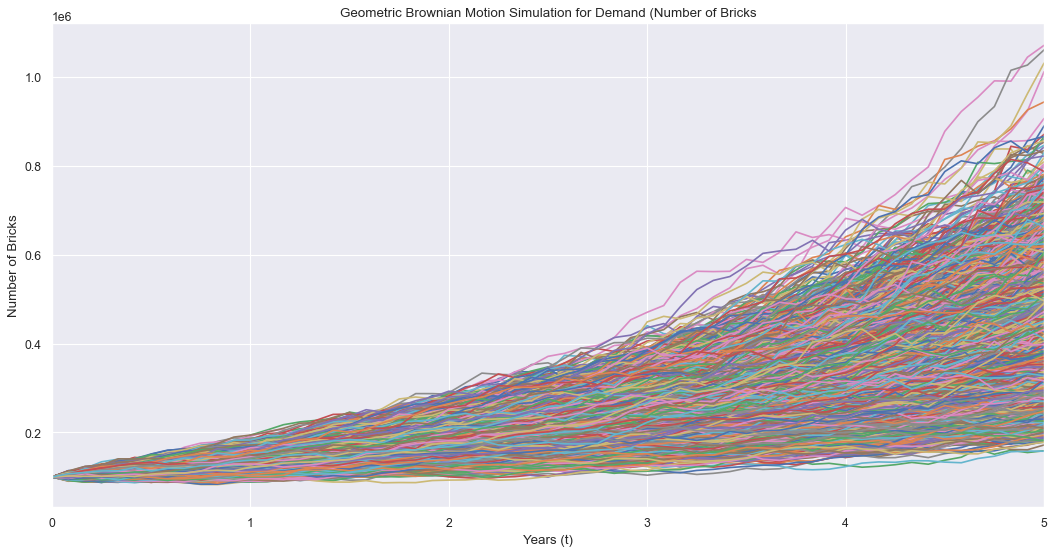

In [175]:
plt.figure(figsize=(16, 8), dpi=80)
sns.set(style="darkgrid")

plt.plot(tt, demand)
plt.xlabel("Years (t)")
plt.ylabel("Number of Bricks")
plt.title("Geometric Brownian Motion Simulation for Demand (Number of Bricks")
plt.xlim([0, T])
plt.show

In [178]:
demand_df =pd.DataFrame(demand.T)

In [219]:
pers = [0.01, 0.1, 1.0, 2.5, 5.0, 10.0]
var1 = scs.scoreatpercentile(demand_df[12], pers)
var2 = scs.scoreatpercentile(demand_df[24], pers)
var3 = scs.scoreatpercentile(demand_df[36], pers)
var4 = scs.scoreatpercentile(demand_df[48], pers)
var5 = scs.scoreatpercentile(demand_df[60], pers)
var_df = pd.DataFrame({'Percentile' : pers, 'Var 1' : var1, 'Var 2' : var2, 'Var 3' : var3, 'Var 4' : var4, 'Var 5' : var5})

In [220]:
var_df

,Percentile,Var 1,Var 2,Var 3,Var 4,Var 5
0,0.01,88734.342669,100279.049579,112917.478652,126283.667270,158836.278043
1,0.10,92286.908439,106794.493830,127383.231180,151710.431522,182835.003654
2,1.00,101859.075984,121132.959159,147159.964477,178622.745281,222239.829664
3,2.50,106363.818289,128292.938438,156309.856738,194744.259430,243212.338052
4,5.00,109790.703466,134798.857892,165953.651189,208001.812041,262573.573008
5,10.00,114334.133762,142342.515110,178940.237195,226254.582114,286655.928937


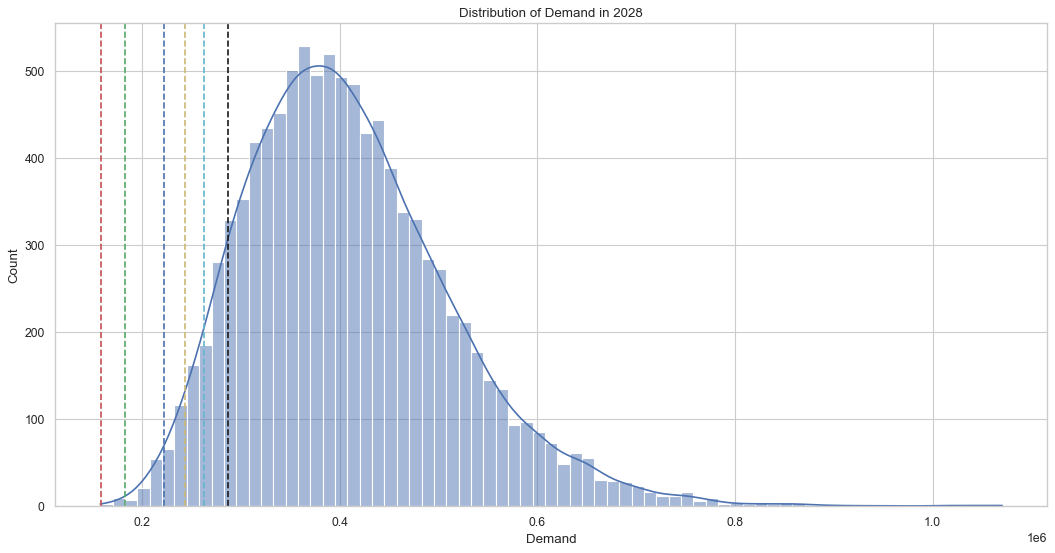

In [223]:
plt.figure(figsize=(16, 8), dpi=80)
sns.set(style="whitegrid")
sns.histplot(demand_df[60], kde=True)
plt.title("Distribution of Demand in 2028")
plt.xlabel("Demand")

color = ['r','g','b','y','c','k']
for i in range(6):
    plt.axvline(var_df['Var 5'][i], c=color[i], linestyle = 'dashed')

plt.show()

In [156]:
print("The most probable demand in 2028 is:\n" + str(demand_df[60].median()))

The most probable demand in 2028 is:
397083.1368358743


##### SImulating Total Polyethylene Waste Recycled

### $$ Recycled_t  = \sum_{x = 0}^{t}S_t * P $$
S = Units sold\
P = Plastic(kg) per unit

In [166]:
benchmark =  10000000
plastic = 0.65

In [167]:
R = (demand*plastic).cumsum(axis=0)

<function matplotlib.pyplot.show(close=None, block=None)>

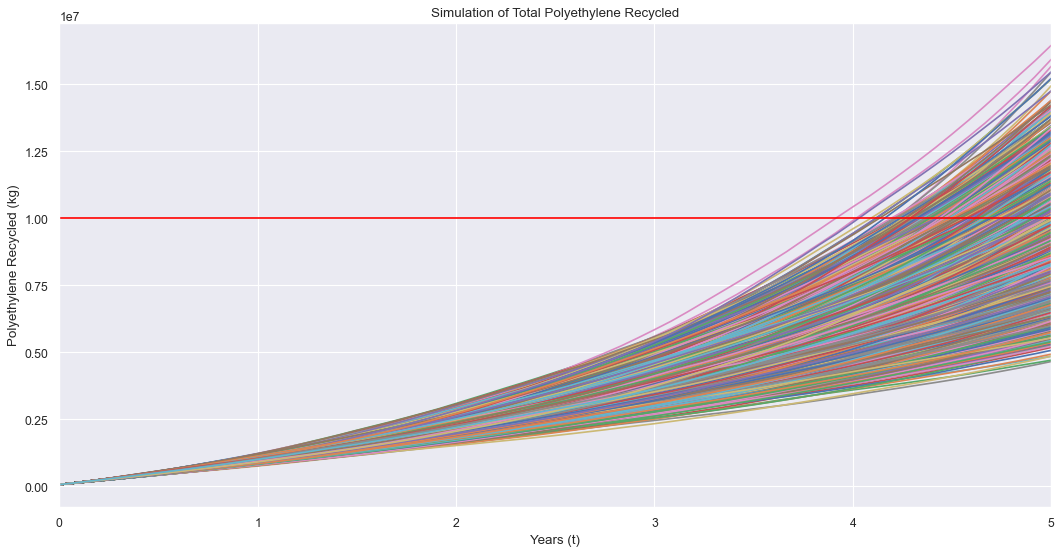

In [168]:
plt.figure(figsize=(16, 8), dpi=80)
sns.set(style="darkgrid")

plt.plot(tt, R)
plt.xlabel("Years (t)")
plt.ylabel("Polyethylene Recycled (kg)")
plt.title("Simulation of Total Polyethylene Recycled")
plt.xlim([0, T])
plt.axhline(benchmark, c='red')
plt.show

In [169]:
recycled_df =pd.DataFrame(R.T)

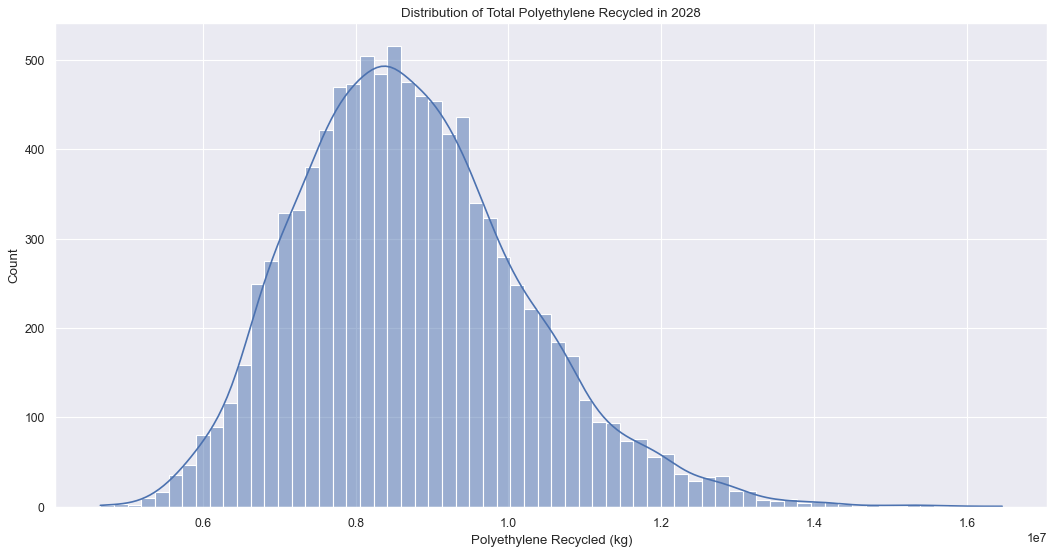

In [170]:
plt.figure(figsize=(16, 8), dpi=80)
sns.set(style="darkgrid")
sns.histplot(recycled_df[60], kde=True)
plt.title("Distribution of Total Polyethylene Recycled in 2028")
plt.xlabel("Polyethylene Recycled (kg)")
plt.show()

In [171]:
prob = (sum(x > benchmark for x in recycled_df[60])/len(recycled_df[60]))

In [174]:
print("The probability of recycling above benchmark is:")
print(str(prob*100) + "%")

The probability of recycling above benchmark is:
18.6%


##### Bayesian Optimisation Minimal Amount of Plastic per Brick to Achieve Benchmark

In [9]:
def recycle_eval(P):
    dt = T/n
    # simulation using numpy arrays
    demand = np.exp(
    (mu - sigma ** 2 / 2) * dt
    + sigma * np.random.normal(0, np.sqrt(dt), size=(M,n)).T
    )
    # include array of 1's
    demand = np.vstack([np.ones(M), demand])
    # multiply through by S0 and return the cumulative product of elements along a given simulation path axis=0. 
    demand = S0 * demand.cumprod(axis=0)
    if x<0: x = 999999
    return -x

In [10]:
#!pip install bayesian-optimization
from bayes_opt import BayesianOptimization

recycle_bo = BayesianOptimization(recycle_eval, {'P' : (0.5, 1.5)})
                              
# init_points=20, n_iter=100 for final pred
recycle_bo.maximize(init_points=20, n_iter=100, acq='ei')

|   iter    |  target   |     P     |
-------------------------------------
|  1        | -2.975e+0 |  1.139    |
|  2        | -1.812e+0 |  0.9477   |
|  3        | -2.072e+0 |  0.9818   |
|  4        | -4.605e+0 |  1.391    |
|  5        | -8.71e+05 |  0.7935   |
|  6        | -4.738e+0 |  1.416    |
|  7        | -6.139e+0 |  0.7453   |
|  8        | -4.339e+0 |  1.348    |
|  9        | -2.454e+0 |  1.047    |
|  10       | -1e+06    |  0.5933   |
|  11       | -1.262e+0 |  0.8493   |
|  12       | -2.841e+0 |  0.6974   |
|  13       | -1e+06    |  0.5133   |
|  14       | -1e+06    |  0.5015   |
|  15       | -4.982e+0 |  1.443    |
|  16       | -2.963e+0 |  1.122    |
|  17       | -1e+06    |  0.6289   |
|  18       | -1e+06    |  0.5018   |
|  19       | -1e+06    |  0.5196   |
|  20       | -1.216e+0 |  0.8518   |
|  21       | -2.249e+0 |  0.6856   |
|  22       | -1.849e+0 |  0.6801   |
|  23       | -1.408e+0 |  0.6729   |
|  24       | -1.665e+0 |  0.6697   |
|  25       

In [12]:
print("Minimum Polyethylene Composition: ", recycle_bo.max, " kg")

Minimum Polyethylene Composition:  {'target': -4535.1547437328845, 'params': {'P': 0.652210168973029}}  kg
